<a href="https://colab.research.google.com/github/mrneerajnegi/Data-Science-Projects/blob/Text_extraction_From_images/Traffic_sign_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#import files to upload kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"neerajnegii","key":"2e5c4c4e622aaa0e830c5a66ee8fa43b"}'}

In [5]:
#install kaggle
!pip install -q kaggle

In [6]:
#make kaggle folder
!mkdir ~/.kaggle

In [7]:
#copy json file to that folder
!cp kaggle.json ~/.kaggle/

In [8]:
#to avaid  permission issues
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
!mkdir traffic_sign_dataset

In [10]:
%cd traffic_sign_dataset/

/content/traffic_sign_dataset


In [11]:
# Searching for dataset
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                             title                                               size  lastUpdated          downloadCount  
----------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign  GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          47183  


In [12]:
# Downloading dataset and coming out of directory
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign  
%cd ..

 99% 604M/612M [00:04<00:00, 111MB/s]
100% 612M/612M [00:04<00:00, 134MB/s]
/content


In [ ]:
# Unzipping downloaded file and removing unusable file
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Dropout,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import random
from PIL import Image
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [15]:
# Storing all lables
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

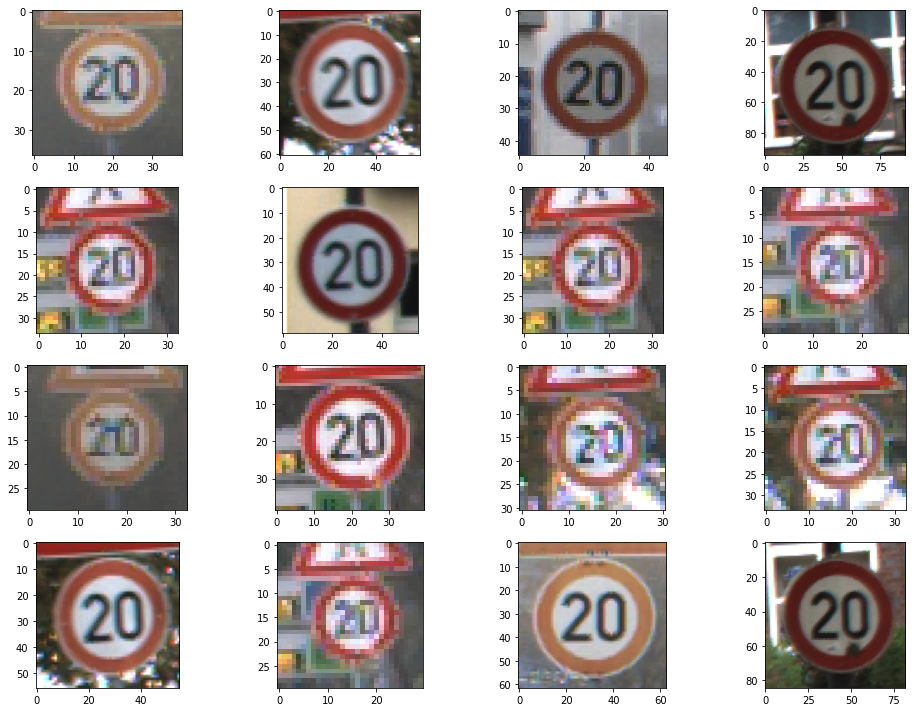

In [16]:
rootPath="./traffic_sign_dataset/Train/0/"
plt.figure(figsize=(14,10))
for i in range(16):
    image=random.choice(os.listdir(rootPath))
    plt.subplot(4,4,i+1)
    plt.tight_layout()
    img=plt.imread(rootPath+image);
    plt.imshow(img)

In [17]:
rootPath="./traffic_sign_dataset/Train/"
height=[]
width=[]
for c in tqdm(range(0,43)):
    classPath=rootPath+str(c)+"/";
    for img in os.listdir(classPath):
        image=plt.imread(classPath+img)
        height.append(image.shape[0])
        width.append(image.shape[1])

100%|██████████| 43/43 [00:13<00:00,  3.19it/s]


In [18]:
HEIGHT=int(np.mean(height))
WIDTH=int(np.mean(width))

In [19]:
print(WIDTH,HEIGHT)

50 50


In [20]:
dataset=[]
labelId=[]
rootPath="./traffic_sign_dataset/Train/"
for lId in tqdm(range(43)):
  classPath=f"{rootPath}{lId}/";
  for path in os.listdir(classPath):
      img=Image.open(f"{classPath}{path}")
      img=img.resize((HEIGHT,WIDTH))
      img=np.array(img)
      dataset.append(img)
      labelId.append(lId)
dataset=np.array(dataset)
labelId=np.array(labelId)


100%|██████████| 43/43 [00:13<00:00,  3.18it/s]


In [21]:
print(len(dataset),len(labelId),dataset.shape,labelId.shape)

39209 39209 (39209, 50, 50, 3) (39209,)


In [22]:
pd.DataFrame(labelId).value_counts()

2     2250
1     2220
13    2160
12    2100
38    2070
10    2010
4     1980
5     1860
25    1500
9     1470
7     1440
8     1410
3     1410
11    1320
35    1200
18    1200
17    1110
31     780
14     780
33     689
15     630
26     600
28     540
23     510
30     450
34     420
16     420
6      420
22     390
36     390
20     360
40     360
21     330
39     300
29     270
24     270
42     240
41     240
27     240
32     240
19     210
37     210
0      210
dtype: int64

In [23]:
dataset=dataset/255

In [24]:
xtrain_val,xtest,ytrain_val,ytest=train_test_split(dataset,labelId,test_size=0.2,)

In [25]:
xtrain,xval,ytrain,yval=train_test_split(xtrain_val,ytrain_val,test_size=0.2,)

In [26]:
model=Sequential()
model.add(Conv2D(128,kernel_size=(3,3),activation="relu",input_shape=dataset.shape[1:]))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,kernel_size=(3,3),activation="relu",input_shape=dataset.shape[1:]))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=dataset.shape[1:]))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(16,kernel_size=(3,3),activation="relu",input_shape=dataset.shape[1:]))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(43,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [27]:
model.compile("adam","sparse_categorical_crossentropy",["accuracy"])

In [28]:
result=model.fit(xtrain,ytrain,32,10,validation_data=(xval,yval))

Epoch 1/10
785/785 [==============================] - 255s 324ms/step - loss: 2.8207 - accuracy: 0.2196 - val_loss: 1.7744 - val_accuracy: 0.4726
Epoch 2/10
785/785 [==============================] - 247s 314ms/step - loss: 1.6546 - accuracy: 0.4801 - val_loss: 0.9635 - val_accuracy: 0.7257
Epoch 3/10
785/785 [==============================] - 246s 313ms/step - loss: 1.2098 - accuracy: 0.6036 - val_loss: 0.6703 - val_accuracy: 0.8100
Epoch 4/10
785/785 [==============================] - 245s 312ms/step - loss: 0.9840 - accuracy: 0.6733 - val_loss: 0.4949 - val_accuracy: 0.8648
Epoch 5/10
785/785 [==============================] - 244s 311ms/step - loss: 0.8187 - accuracy: 0.7292 - val_loss: 0.3865 - val_accuracy: 0.8918
Epoch 6/10
785/785 [==============================] - 244s 311ms/step - loss: 0.7136 - accuracy: 0.7618 - val_loss: 0.3209 - val_accuracy: 0.9174
Epoch 7/10
785/785 [==============================] - 244s 311ms/step - loss: 0.6422 - accuracy: 0.7883 - val_loss: 0.2797 -

In [35]:
result_df=pd.DataFrame(result.history,columns=result.history.keys())

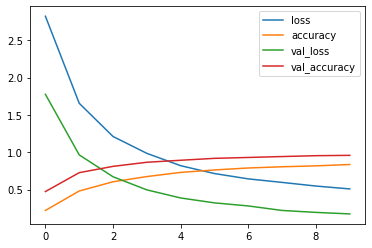

In [36]:
result_df.plot()

In [38]:
model.evaluate(xtest,ytest)

246/246 [==============================] - 26s 104ms/step - loss: 0.1625 - accuracy: 0.9607


[0.16251850128173828, 0.9607242941856384]

Image
Actual :  Stop
Pridction : Stop


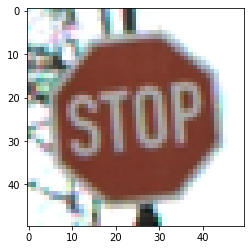

In [51]:
print("Image")
plt.imshow(xtest[4])
print("Actual : ", all_lables[ytest[4]])
pridiction=model.predict(np.expand_dims(xtest[4],axis=0))
print("Pridction :"  ,all_lables[pridiction.argmax()])


In [47]:
ytest

array([ 7,  4, 22, ...,  2, 27, 17])

'Bumpy road'